In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage.color import rgb2hsv

# Define the grayscale image matrix
image = np.array([
    [20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
    [20, 50, 50, 50, 50, 50, 50, 50, 50, 20],
    [20, 50, 100, 100, 100, 100, 100, 100, 50, 20],
    [20, 50, 100, 150, 150, 150, 150, 100, 50, 20],
    [20, 50, 100, 150, 200, 200, 150, 100, 50, 20],
    [20, 50, 100, 150, 150, 150, 150, 100, 50, 20],
    [10, 20, 50, 100, 150, 200, 150, 100, 50, 20],
    [10, 20, 50, 100, 150, 150, 100, 50, 20, 10],
    [20, 50, 50, 50, 100, 100, 50, 50, 50, 20],
    [20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
], dtype=np.float32)

In [3]:
# Define Sobel and Roberts kernels
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype=np.float32)
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)

roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

In [5]:
# Apply Sobel operator
sobel_edges_x = convolve(image, sobel_x)
sobel_edges_y = convolve(image, sobel_y)
sobel_edges = np.sqrt(sobel_edges_x**2 + sobel_edges_y**2)


In [6]:
# Apply Roberts operator
roberts_edges_x = convolve(image, roberts_x)
roberts_edges_y = convolve(image, roberts_y)
roberts_edges = np.sqrt(roberts_edges_x**2 + roberts_edges_y**2)

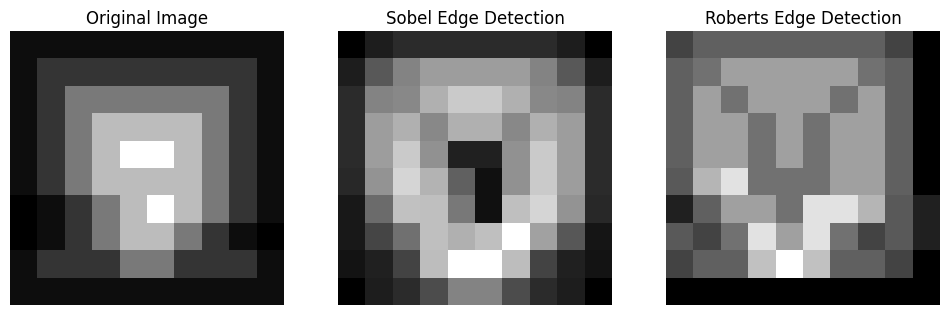

In [7]:
# Plotting the original and edge-detected images
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(sobel_edges, cmap='gray')
ax[1].set_title("Sobel Edge Detection")
ax[2].imshow(roberts_edges, cmap='gray')
ax[2].set_title("Roberts Edge Detection")
for a in ax:
    a.axis('off')
plt.show()

In [8]:
# Region-growing algorithm
def region_growing(image, seed, threshold=10):
    segmented = np.zeros_like(image, dtype=bool)
    region_mean = image[seed]
    to_process = [seed]

    while to_process:
        x, y = to_process.pop()
        if segmented[x, y]:
            continue
        segmented[x, y] = True

        neighbors = [(x+dx, y+dy) for dx in [-1, 1, 0, 0] for dy in [0, 0, -1, 1]]
        for nx, ny in neighbors:
            if (0 <= nx < image.shape[0]) and (0 <= ny < image.shape[1]) and not segmented[nx, ny]:
                if abs(image[nx, ny] - region_mean) <= threshold:
                    to_process.append((nx, ny))
                    region_mean = (region_mean + image[nx, ny]) / 2  # Update mean with new region pixel

    return segmented

In [9]:
# Applying region growing from a central seed
segmentation = region_growing(image, (5, 5), threshold=10)

In [10]:
# Converting the segmented region to HSI
segmentation_rgb = np.dstack([segmentation]*3).astype(float) * image.max()
segmentation_hsi = rgb2hsv(segmentation_rgb)

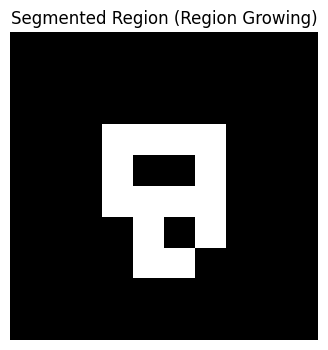

HSI values of segmented region:
[[[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0. 200.]
  [  0.   0. 200.]
  [  0.   0. 200.]
  [  0.   0. 200.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0. 200.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0. 200.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0. 

In [11]:
# Display segmented region and HSI values
plt.figure(figsize=(6, 4))
plt.imshow(segmentation, cmap='gray')
plt.title("Segmented Region (Region Growing)")
plt.axis('off')
plt.show()

print("HSI values of segmented region:")
print(segmentation_hsi)